In [1]:

import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [2]:
df = pd.read_csv("/workspaces/group-project-team-omega/code/cleanedData/Final_Model_data.csv")
df = df.dropna(subset=["first_pit_lap"])

In [3]:
final_features = [
    "year", "round", "circuitId",
    "driverId", "constructorId",
    "grid", "laps", "pit_stop_count",
    "track_length_km", "race_distance_km",
    "tyre_deg_level", "pit_lane_loss"
]

X = df[final_features]
y = df["first_pit_lap"]


In [4]:
cat_cols = ["circuitId", "driverId", "constructorId"]
cat_idx = [final_features.index(c) for c in cat_cols]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
train_pool = Pool(X_train, y_train, cat_features=cat_idx)
test_pool = Pool(X_test, cat_features=cat_idx)


In [7]:
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function='RMSE',
    eval_metric='MAE',
    random_state=42,
    verbose=False
)


In [8]:
model.fit(train_pool)


In [9]:
train_pred = model.predict(train_pool)
test_pred = model.predict(test_pool)


In [11]:
print("Train MAE:", mean_absolute_error(y_train, train_pred))
print("Test MAE:", mean_absolute_error(y_test, test_pred))

print("Train R2:", r2_score(y_train, train_pred))
print("Test R2:", r2_score(y_test, test_pred))



Train MAE: 2.54012921461931
Test MAE: 3.0985577032102536
Train R2: 0.7022257539175608
Test R2: 0.5836385980894527


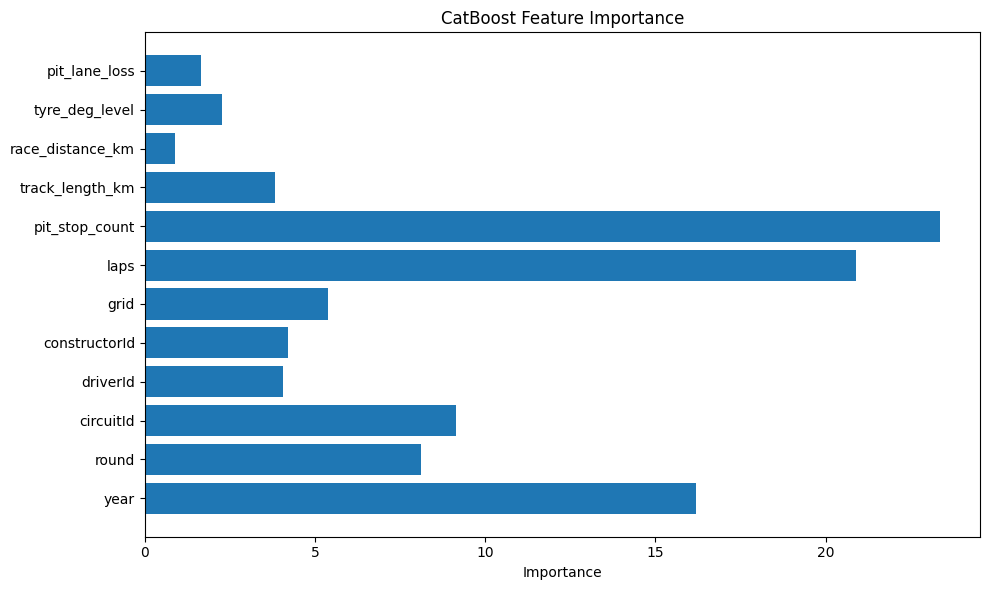

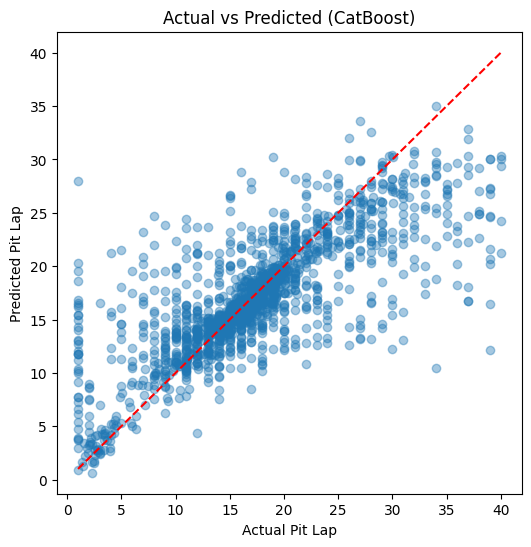

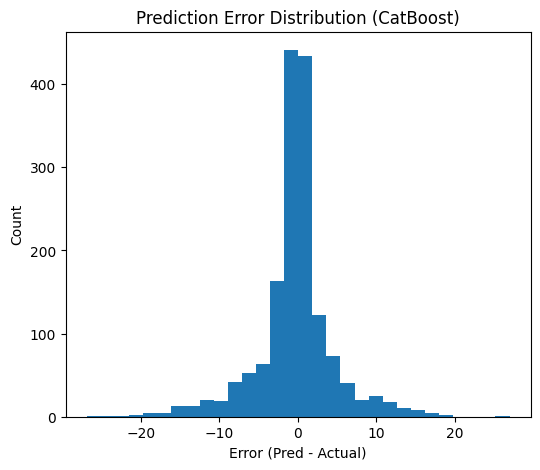

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ====== FEATURE IMPORTANCE (CatBoost) ======
importances = model.get_feature_importance(train_pool)

fi_df = pd.DataFrame({
    "feature": final_features,
    "importance": importances
})

plt.figure(figsize=(10, 6))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.title("CatBoost Feature Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# ====== ACTUAL vs PREDICTED (CatBoost) ======
plt.figure(figsize=(6, 6))
plt.scatter(y_test, test_pred, alpha=0.4)
plt.xlabel("Actual Pit Lap")
plt.ylabel("Predicted Pit Lap")
plt.title("Actual vs Predicted (CatBoost)")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "r--"
)
plt.show()

# ====== ERROR DISTRIBUTION (CatBoost) ======
errors = test_pred - y_test

plt.figure(figsize=(6, 5))
plt.hist(errors, bins=30)
plt.title("Prediction Error Distribution (CatBoost)")
plt.xlabel("Error (Pred - Actual)")
plt.ylabel("Count")
plt.show()
